# Breast Cancer Wisconsin (Diagnostic) Data Set

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [11]:
headers = ["ID", "Diagnosis",
           "radius_ME", "texture_ME", "perimeter_ME", "area_ME", "smoothness_ME", "compactness_ME", "concavity_ME", "concave_points_ME", "symmetry_ME", "fractal_dimension_ME",
           "radius_SE", "texture_SE", "perimeter_SE", "area_SE", "smoothness_SE", "compactness_SE", "concavity_SE", "concave_points_SE", "symmetry_SE", "fractal_dimension_SE",
           "radius_WS", "texture_WS", "perimeter_WS", "area_WS", "smoothness_WS", "compactness_WS", "concavity_WS", "concave_points_WS", "symmetry_WS", "fractal_dimension_WS"]

df = pd.read_csv('Data/wdbc.data', names=headers)
pd.set_option('max_columns',len(df.columns))
df

,ID,Diagnosis,radius_ME,texture_ME,perimeter_ME,area_ME,smoothness_ME,compactness_ME,concavity_ME,concave_points_ME,symmetry_ME,fractal_dimension_ME,radius_SE,texture_SE,perimeter_SE,area_SE,smoothness_SE,compactness_SE,concavity_SE,concave_points_SE,symmetry_SE,fractal_dimension_SE,radius_WS,texture_WS,perimeter_WS,area_WS,smoothness_WS,compactness_WS,concavity_WS,concave_points_WS,symmetry_WS,fractal_dimension_WS
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.02165,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.01369,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.01486,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.02143,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.0390,23.940,0.007149,0.072170,0.077430,0.014320,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


## Data preprocessing

In [12]:
df = pd.get_dummies(df[df.columns])

In [13]:
df.head()

,ID,radius_ME,texture_ME,perimeter_ME,area_ME,smoothness_ME,compactness_ME,concavity_ME,concave_points_ME,symmetry_ME,fractal_dimension_ME,radius_SE,texture_SE,perimeter_SE,area_SE,smoothness_SE,...,concavity_SE,concave_points_SE,symmetry_SE,fractal_dimension_SE,radius_WS,texture_WS,perimeter_WS,area_WS,smoothness_WS,compactness_WS,concavity_WS,concave_points_WS,symmetry_WS,fractal_dimension_WS,Diagnosis_B,Diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,...,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,...,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,...,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,...,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,...,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


## Data Visualization

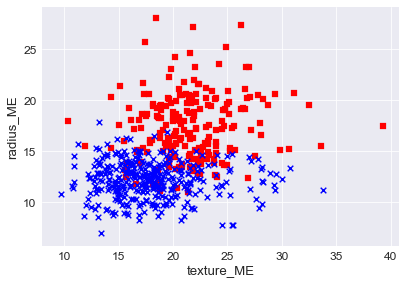

In [14]:
colors = ['r', 'b']
markers = ['s', 'x']


for l, c, m in zip(np.unique(df["Diagnosis_B"]), colors, markers): 
    plt.scatter(df["texture_ME"][df["Diagnosis_B"]==l],
                df["radius_ME"][df["Diagnosis_B"]==l],
                c=c, label=l, marker=m)
plt.xlabel('texture_ME')
plt.ylabel('radius_ME')
plt.show()

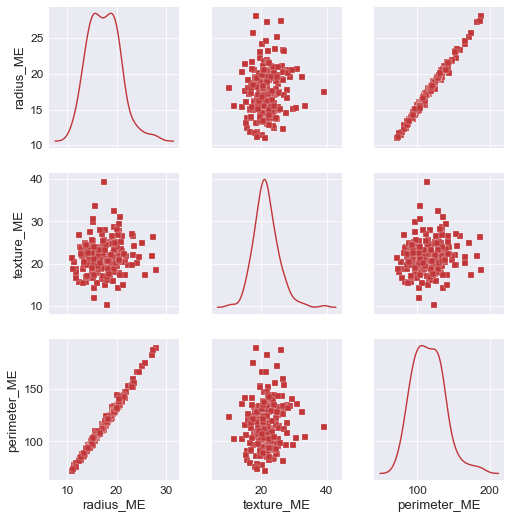

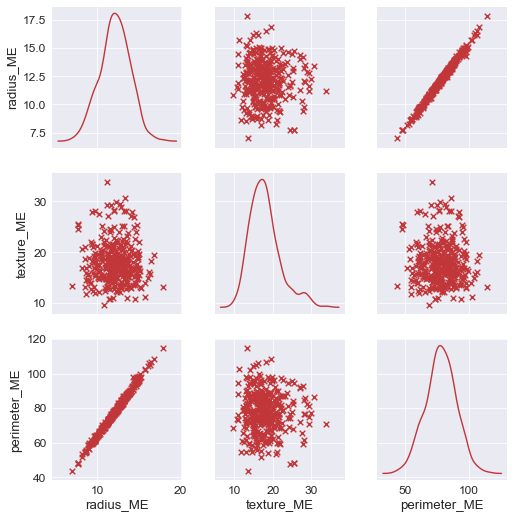

In [15]:
sns.set(style='darkgrid', context='paper', font_scale=1.5, palette="RdBu")

cols = ['radius_ME', 'texture_ME', 'perimeter_ME']

for l, m in zip(np.unique(df["Diagnosis_B"]), markers):
    sns.pairplot(df[cols][df["Diagnosis_B"]==l], size=2.5, markers=m, diag_kind='kde')
plt.show()

In [16]:
df.columns

Index(['ID', 'radius_ME', 'texture_ME', 'perimeter_ME', 'area_ME',
       'smoothness_ME', 'compactness_ME', 'concavity_ME', 'concave_points_ME',
       'symmetry_ME', 'fractal_dimension_ME', 'radius_SE', 'texture_SE',
       'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE',
       'concavity_SE', 'concave_points_SE', 'symmetry_SE',
       'fractal_dimension_SE', 'radius_WS', 'texture_WS', 'perimeter_WS',
       'area_WS', 'smoothness_WS', 'compactness_WS', 'concavity_WS',
       'concave_points_WS', 'symmetry_WS', 'fractal_dimension_WS',
       'Diagnosis_B', 'Diagnosis_M'],
      dtype='object')

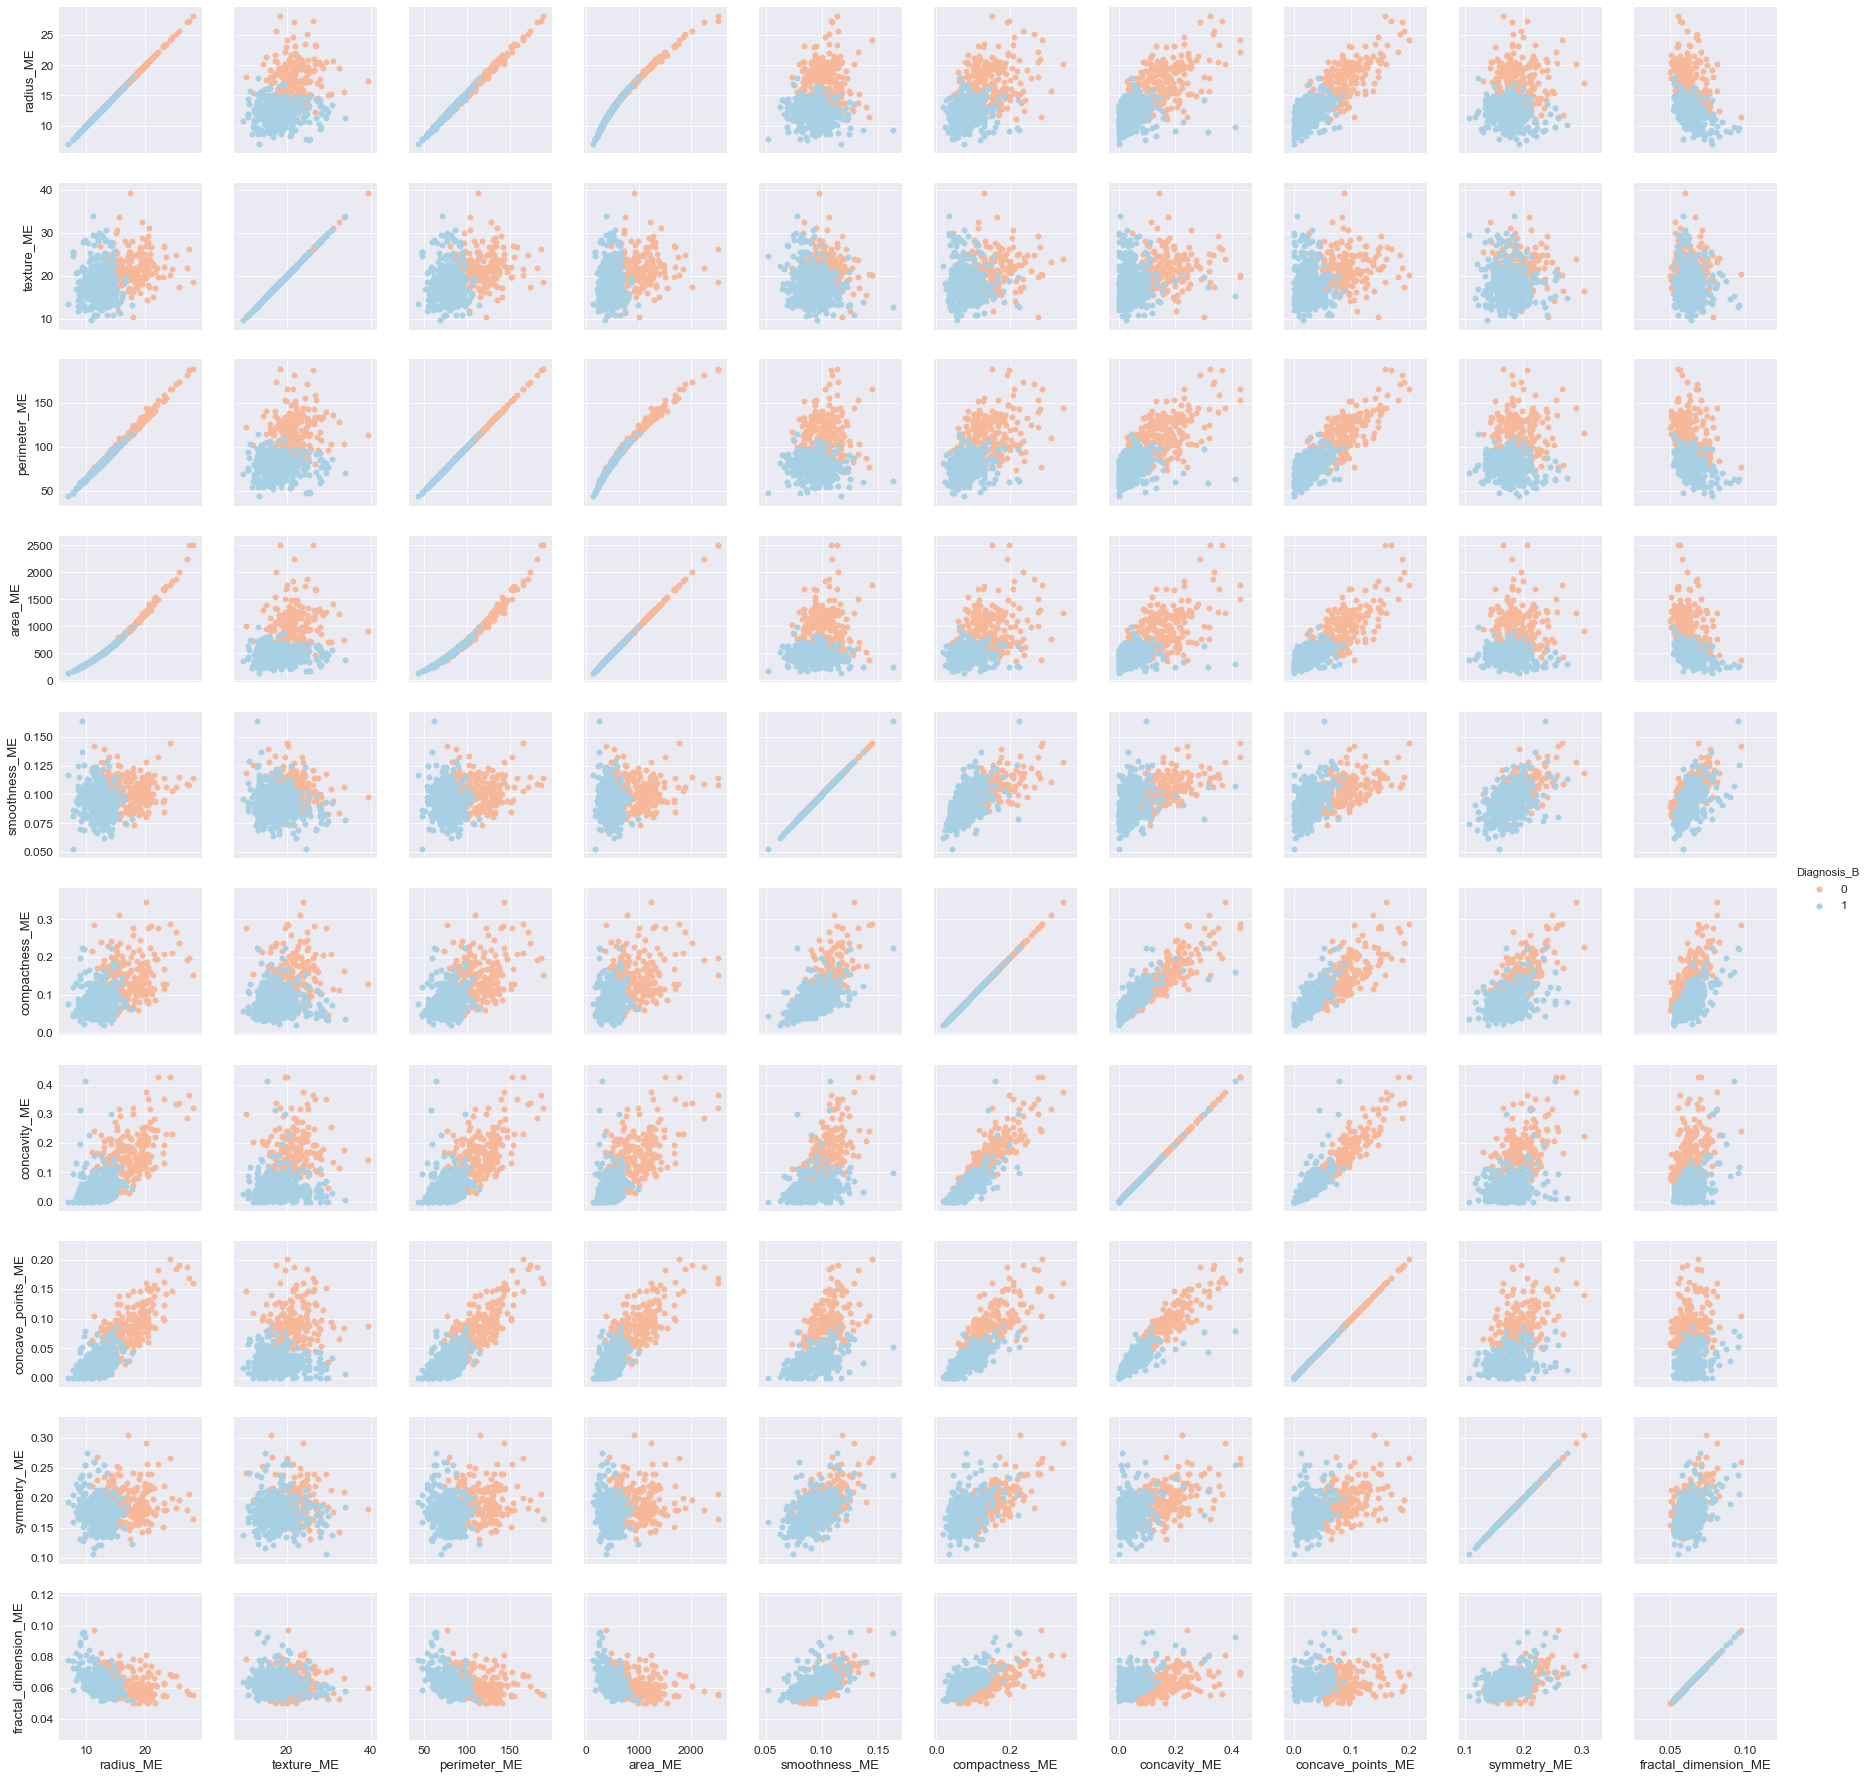

In [24]:
cols = ['radius_ME', 'texture_ME', 'perimeter_ME']
g=sns.PairGrid(df, vars=df.columns[1:11], hue="Diagnosis_B", palette='RdBu')
g = g.map(plt.scatter)
g = g.add_legend()
plt.show()